# [](https://learning.quantum.ibm.com/course/basics-of-quantum-information/)IBM Quantum Learning, Basics of Quantum Information 
# (4) Entanglement in Action
* As a part of my learning, I'm trying to understand the basic framework of quantum information.
* In this sub-course Entanglement in Action, we'll take a look at three fundamentally important examples.
* The first two are the teleportation and superdense coding protocols, which are principally concerned with the transmission of information from a sender to a receiver.
* The third example is an abstract game, called the CHSH game, which illustrates a phenomenon in quantum information that is sometimes referred to as nonlocality. (The CHSH game is not always described as a game. It is often described instead as an experiment — specifically, it is an example of a Bell test — and is referred to as the CHSH inequality.)
* Teleportation, superdense coding, and the CHSH game are not merely examples meant to illustrate how quantum information works, although they do serve well in this regard. Rather, they are stones in the foundation of quantum information.
* Entanglement plays a key role in all three examples, so this lesson provides the first opportunity in this course to see entanglement in action, and to begin to explore what it is that makes entanglement such an interesting and important concept.
# Major Topics Covered
* Introduction
  * Alice and Bob
  * Entanglement as a resource
* Teleportation
  * Protocol
  * Analysis
  * Further Discussion
  * Qiskit Implementation
* Superdense coding
  * Protocol
  * Analysis
  * Qiskit Implementation
* The CHSH game
  * Nonlocal games
  * CHSH game description
  * Limitation of classical strategies
  * CHSH game strategy
  * Remarks
  * Qiskit implementation
* Post-Course Survey

# Alice and Bob
* Alice and Bob are names traditionally given to hypothetical entities or agents in systems, protocols, games, and other interactions that involve the exchange of information.
* While these are typically human names, it should be understood that they represent abstractions and not necessarily actual human beings — so Alice and Bob might be expected to perform complex computations, for instance.
* These names were first used in this way in the 1970s in the context of cryptography, but the convention has become common more broadly since then. The idea is simply that these are common names (at least in some parts of the world) that start with the letters A and B. It is also quite convenient to refer to Alice with the pronoun "her" and Bob with the pronoun "him" for the sake of brevity.
* By default, we imagine that Alice and Bob are in different locations. They may have different goals and behaviors depending on the context in which they arise.
* For example, in communication, meaning the transmission of information, we might decide to use the name Alice to refer to the sender and Bob to refer to the receiver of whatever information is transmitted.
* In general, it may be that Alice and Bob cooperate, which is typical of a wide range of settings — but in other settings they may be in competition, or they may have different goals that may or may not be consistent or harmonious.These things must be made clear in the situation at hand.
* We can also introduce additional characters, such as Charlie and Diane, as needed. Other names that represent different personas, such as Eve for an eavesdropper or Mallory for someone behaving maliciously, are also sometimes used.
* Alice and Bob appear in all three of the examples to be discussed in this lesson, and we will encounter them from time to time in subsequent lessons.

# Entanglement as a resource
* Recall this example of an entangled quantum state of two qubits from the Multiple systems lesson:

∣
ϕ
+
⟩
=
1
2
∣
00
⟩
+
1
2
∣
11
⟩
.
(1)
∣ϕ 
+
 ⟩= 
2
​
 
1
​
 ∣00⟩+ 
2
​
 
1
​
 ∣11⟩.(1)
* It is one of the four Bell states, and is often viewed as the archetypal example of an entangled quantum state.

* We also encountered this example of a probabilistic state of two bits:

1
2
∣
00
⟩
+
1
2
∣
11
⟩
.
(2)
2
1
​
 ∣00⟩+ 
2
1
​
 ∣11⟩.(2)
* It is, in some sense, analogous to the entangled quantum state (1). It represents a probabilistic state in which two bits are correlated, but it is not entangled. Entanglement is a uniquely quantum phenomenon, essentially by definition: in simplified terms, entanglement refers to non-classical quantum correlations.
* Unfortunately, defining entanglement as non-classical quantum correlation is somewhat unsatisfying at an intuitive level, because it's a definition of entanglement is in terms of what it is not. It may be for this reason that it's actually rather challenging to explain precisely what entanglement is, and what makes it special, in intuitive terms.
* Typical explanations of entanglement often fail to distinguish the two states (1) and (2) in a meaningful way. For example, it is sometimes said that if one of two entangled qubits is measured, then the state of the other qubit is somehow instantaneously affected; or that the state of the two qubits together cannot be described separately; or that the two qubits somehow maintain a memory of each other. These statements are not false, but why are they not also true for the (unentangled) probabilistic state (2) above? The two bits represented by this state are intimately connected: each one has a perfect memory of the other in a literal sense. But the state is nevertheless not entangled.
* One way to explain what makes entanglement special, and what makes the quantum state 
(1) very different from the probabilistic state (2), is to explain what can be done with entanglement, or what we can see happening because of entanglement, that goes beyond the decisions we make about how to represent our knowledge of states using vectors. All three of the examples to be discussed in this lesson have this nature, in that they illustrate things that can be done with the state (1) that cannot be done with any classically correlated state, including the state (2).
* Indeed, it is typical in the study of quantum information and computation that entanglement is viewed as a resource through which different tasks can be accomplished. When this is done, the state (1) is viewed as representing one unit of entanglement, which we refer to as an e-bit. The "e" stands for "entangled" or "entanglement." While it is true that the state 
(1) is a state of two qubits, the quantity of entanglement that it represents is one e-bit.
* Incidentally, we can also view the probabilistic state 
(2) as a resource, which is one bit of shared randomness. It can be very useful in cryptography, for instance, to share a random bit with somebody (presuming that nobody else knows what the bit is), so that it can be used as a private key, or part of a private key, for the sake of encryption. But in this lesson the focus is on entanglement and a few things we can do with it.
* As a point of clarification regarding terminology, when we say that Alice and Bob share an e-bit, what we mean is that Alice has a qubit named A, Bob has a qubit named B, and together the pair (A,B) is in the quantum state (1).
* Different names could, of course, be chosen for the qubits, but throughout this lesson we will stick with these names in the interest of clarity.

# Teleportation
* Quantum teleportation, or just teleportation for short, is a protocol where a sender (Alice) transmits a qubit to a receiver (Bob) by making use of a shared entangled quantum state (one e-bit, to be specific) along with two bits of classical communication.
* The name teleportation is meant to be suggestive of the concept in science fiction where matter is transported from one location to another by a futuristic process, but it must be understood that matter is not teleported in quantum teleportation — what is actually teleported is quantum information.
* The set-up for teleportation is as follows.
We assume that Alice and Bob share an e-bit: Alice holds a qubit A, Bob holds a qubit B, and together the pair (A,B) is in the state ∣ϕ +⟩.
* It could be, for instance, that Alice and Bob were in the same location in the past, they prepared the qubits A and B in the state ∣ϕ +⟩, and then each went their own way with their qubit in hand. Or, it could be that a different process, such as one involving a third party or a complex distributed process, was used to establish this shared e-bit. These details are not part of the teleportation protocol itself.
* Alice then comes into possession of a third qubit Q that she wishes to transmit to Bob. The state of the qubit Q is considered to be unknown to Alice and Bob, and no assumptions are made about it. For example, the qubit Q might be entangled with one or more other systems that neither Alice nor Bob can access. To say that Alice wishes to transmit the qubit Q to Bob means that Alice would like Bob to be holding a qubit that is in the same state that Q was in at the start of the protocol, having whatever correlations that Q had with other systems, as if Alice had physically handed Q to Bob.
* We could imagine that Alice physically sends the qubit Q to Bob, and if it reaches Bob without being altered or disturbed in transit, then Alice and Bob's task will be accomplished. In the context of teleportation, however, it is our assumption that this is not feasible; Alice cannot send qubits directly to Bob. She may, however, send classical information to Bob.
* These are reasonable assumptions in a variety of settings. For example, if Alice doesn't know Bob's exact location, or the distance between them is large, physically sending a qubit using the technology of today, or the foreseeable future, would be challenging to say the least. However, as we know from everyday experiences, classical information transmission under these circumstances is quite straightforward.
* At this point, one might ask whether it is possible for Alice and Bob to accomplish their task without even needing to make use of a shared e-bit. In other words, is there any way to transmit a qubit using classical communication alone?
* The answer is no, it is not possible to transmit quantum information using classical communication alone. This is not too difficult to prove mathematically using basic quantum information theory, but we can alternatively rule out the possibility of transmitting qubits using classical communication alone by thinking about the no-cloning theorem.
* Imagine that there was a way to send quantum information using classical communication alone. Classical information can easily be copied and broadcast, which means that any classical transmission from Alice to Bob might also potentially be received by a second receiver (Charlie, let us say). But if Charlie receives the same classical communication that Bob received, then would he not also be able to obtain a copy of the qubit Q? This would suggest that Q was cloned, which we already know is impossible from the no-cloning theorem, and so we conclude that there is no way to send quantum information using classical communication alone.
* When the assumption that Alice and Bob share an e-bit is in place, however, it is possible for Alice and Bob to accomplish their task. This is precisely what the quantum teleportation protocol does.

# Protocol
* Here is a quantum circuit diagram that describes the teleportation protocol:
![](https://learning-api.quantum.ibm.com/assets/5e6f6de1-2f5c-4938-a086-831d6b303cb8?format=auto&quality=80)

* The diagram is slightly stylized in that it depicts the separation between Alice and Bob, with two diagonal wires representing classical bits that are sent from Alice to Bob, but otherwise it is an ordinary quantum circuit diagram. The qubit names are shown above the wires rather than to the left so that the initial states can be shown as well (which we will commonly do when it is convenient).
* In words, the teleportation protocol is as follows:
1. Alice performs a controlled-NOT operation on the pair (A,Q), with Q being the control and A being the target, and then performs a Hadamard operation on Q.
2. Alice then measures both A and Q, with respect to a standard basis measurement in both cases, and transmits the classical outcomes to Bob. Let us refer to the outcome of the measurement of A as a and the outcome of the measurement of Q as b.
3. Bob receives a and b from Alice, and depending on the values of these bits he performs these operations:
- If a=1, then Bob performs a bit flip (or X gate) on his qubit B.
- If b=1, then Bob performs a phase flip (or Z gate) on his qubit B.
That is, conditioned on ab being 00,01,10, or 11, Bob performs one of the operations I, Z, X, or ZX on the qubit B.
* This is the complete description of the teleportation protocol. The analysis that appears below reveals that when it is run, the qubit B will be in whatever state Q was in prior to the protocol being executed, including whatever correlations it had with any other systems — which is to say that the protocol has effectively implemented a perfect qubit communication channel, where the state of 
Q has been "teleported" into B.
* Before proceeding to the analysis, notice that this protocol does not succeed in cloning the state of Q, which we already know is impossible by the no-cloning theorem. Rather, when the protocol is finished, the state of the qubit Q will have changed from its original value to ∣b⟩ as a result of the measurement performed on it. Also notice that the e-bit has effectively been "burned" in the process: the state of A has changed to ∣a⟩ and is no longer entangled with B (or any other system). This is the cost of teleportation.

# Analysis
* To analyze the teleportation protocol, we'll examine the behavior of the circuit described above, one step at a time, beginning with the situation in which Q is initially in the state α∣0⟩+β∣1⟩.
* This is not the most general situation, as it does not capture the possibility that Q is entangled with other systems, but starting with this simpler case will add clarity to the analysis.
* The more general case is addressed below, following the analysis of the simpler case.
* Specifically, we will consider the states of the qubits (B,A,Q) at the times suggested by this figure:
![](https://learning-api.quantum.ibm.com/assets/0a8d5185-74c8-4aa2-9307-a2fcb2f9e82a?format=auto&quality=80)

![](https://raw.githubusercontent.com/TasleemaShaik/TerminationProject-QuantumComputing/refs/heads/main/IbmQuantumComputing/Images/Analysis-1.jpeg)
* At first glance, it might look like something magical has happened, because the leftmost qubit B now seems to depend on the numbers α and β, even though there has not yet been any communication from Alice to Bob.
* This is an illusion. Scalars float freely through tensor products, so α and β are neither more nor less associated with the leftmost qubit than they are with the other qubits, and all we have done is to use algebra to express the state in a way that facilitates an analysis of the measurements.
* Now let us consider the four possible outcomes of Alice's standard basis measurements, together with the actions that Bob performs as a result.

# Possible outcomes
![](http://)
* We now see, in all four cases, that Bob's qubit B is left in the state α∣0⟩+β∣1⟩ at the end of the protocol, which is the initial state of the qubit Q. This is what we wanted to show: the teleportation protocol has worked correctly.
* We also see that the qubits A and Q are left in one of the four states ∣00⟩, ∣01⟩, ∣10⟩, or ∣11⟩, each with probability 1/4, depending upon the measurement outcomes that Alice obtained. Thus, as was already suggested above, at the end of the protocol Alice no longer has the state α∣0⟩+β∣1⟩, which is consistent with the no-cloning theorem.
* Also notice that Alice's measurements yield absolutely no information about the state α∣0⟩+β∣1⟩. That is, the probability for each of the four possible measurement outcomes is 1/4, irrespective of α and β.
* This is also essential for teleportation to work correctly. Extracting information from an unknown quantum state necessarily disturbs it in general, but here Bob obtains the state without it being disturbed.
* Now let's consider the more general situation in which the qubit Q is initially entangled with another system, which we'll name R.
* A similar analysis to the one above reveals that the teleportation protocol functions correctly in this more general case: at the end of the protocol, the qubit B held by Bob is entangled with R in the same way that Q was at the start of the protocol, as if Alice had simply handed Q to Bob.

![](https://learning-api.quantum.ibm.com/assets/ea0316fe-df35-4e95-baa4-b97774b04437?format=auto&quality=80)

* To analyze what happens when the teleportation protocol is run, it is helpful to permute the systems, along the same lines that was described in the Multiple systems lesson. Specifically, we'll consider the state of the systems in the order 
(B,R,A,Q) rather than (B,A,Q,R). The names of the various systems are included as subscripts in the expressions that follow for clarity.
* At the start of the protocol, the state of these systems is as follows:
* First the controlled-NOT gate is applied, which transforms this state to
* Then the Hadamard gate is applied. After expanding and simplifying the resulting state, along similar lines to the analysis of the simpler case above, we obtain this expression of the resulting state:
* Proceeding exactly as before, where we consider the four different possible outcomes of Alice's measurements along with the corresponding actions performed by Bob, we find that at the end of the protocol, the state of (B,R) is always
* Informally speaking, the analysis does not change in a significant way as compared with the simpler case above;  essentially just "come along for the ride." So, teleportation succeeds in creating a perfect quantum communication channel, effectively transmitting the contents of the qubit 
Q into B and preserving all correlations with other systems.
* This is actually not surprising at all, given the analysis of the simpler case above. As that analysis revealed, we have a physical process that acts like the identity operation on a qubit in an arbitrary quantum state, and there's only one way that can happen: the operation implemented by the protocol must be the identity operation. That is, once we know that teleportation works correctly for a single qubit in isolation, we can conclude that the protocol effectively implements a perfect, noiseless quantum channel, and so it must work correctly even if the input qubit is entangled with another system.

# Further discussion
Here are a few brief, concluding remarks on teleportation.
* First, teleportation is not an application of quantum information, it's a protocol for performing quantum communication. It is therefore useful only insofar as quantum communication is useful.
* Indeed, it is reasonable to speculate that teleportation could one day become a standard way to communicate quantum information, perhaps through a process known as entanglement distillation. This is a process that converts a larger number of noisy (or imperfect) e-bits into a smaller number of high-quality e-bits, that could then be used for noiseless or near-noiseless teleportation. The idea is that the process of entanglement distillation is not as delicate as direct quantum communication.
* We could accept losses, for instance, and if the process doesn't work out, we can just try again. In contrast, the actual qubits we hope to communicate might be much more precious.
* Finally, it should be understood that the idea behind teleportation and the way that it works is quite fundamental in quantum information and computation. It really is a cornerstone of quantum information theory, and variations of it arise. For example, quantum gates can be implemented through a closely related process known as quantum gate teleportation, which uses teleportation to apply operations to qubits rather than communicating them.

# Installing Required Qiskit Package through pip install

In [1]:
!pip install qiskit
!pip install qiskit-ibm-runtime
!pip install qiskit[visualization]
!pip install qiskit_aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 60.1 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 39.7 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 29.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 45.2 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.9/363.9 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.5/69.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=3d0587ba6d9cd54b7bb52b593310272dd41df33d075d

# Checking Qiskit Version

In [2]:
from qiskit import __version__
print(__version__)

2.0.2


# Importing the QuantumCircuit, QuantumRegister, ClassicalRegister

In [3]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, array_to_latex
from qiskit.result import marginal_distribution
from qiskit.circuit.library import UGate
from numpy import pi, random

* Here is a quantum circuit implementation of the teleportation protocol.

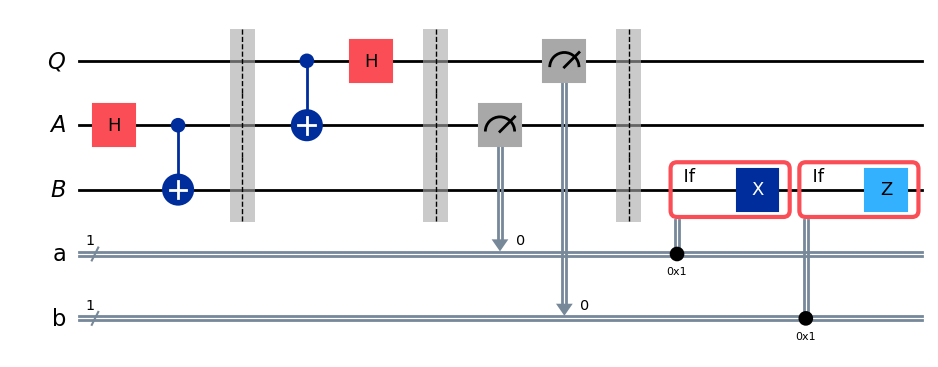

In [4]:
qubit = QuantumRegister(1, "Q")
ebit0 = QuantumRegister(1, "A")
ebit1 = QuantumRegister(1, "B")
a = ClassicalRegister(1, "a")
b = ClassicalRegister(1, "b")

protocol = QuantumCircuit(qubit, ebit0, ebit1, a, b)

# Prepare ebit used for teleportation
protocol.h(ebit0)
protocol.cx(ebit0, ebit1)
protocol.barrier()

# Alice's operations
protocol.cx(qubit, ebit0)
protocol.h(qubit)
protocol.barrier()

# Alice measures and sends classical bits to Bob
protocol.measure(ebit0, a)
protocol.measure(qubit, b)
protocol.barrier()

# Bob uses the classical bits to conditionally apply gates
with protocol.if_test((a, 1)):
    protocol.x(ebit1)
with protocol.if_test((b, 1)):
    protocol.z(ebit1)

display(protocol.draw(output="mpl"))

* The circuit makes use of a few features of Qiskit that we've not yet seen in previous lessons, including the barrier and if_test functions. The barrier function creates a visual separation making the circuit diagram more readable, and it also prevents Qiskit from performing various simplifications and optimizations across the barrier during compilation when circuits are run on real hardware. The if_test function applies an operation conditionally depending on a classical bit or register.
* The circuit first initializes (A,B) to be in a ∣ϕ + ⟩ state (which is not part of the protocol itself), followed by Alice's operations, then her measurements, and finally Bob's operations. To test that the protocol works correctly, we'll apply a randomly generated single-qubit gate to the initialized ∣0⟩ state of Q to obtain a random quantum state vector to be teleported. By applying the inverse (i.e., conjugate transpose) of that gate to B after the protocol is run, we can verify that the state was teleported by measuring to see that it has returned to the ∣0⟩ state.
* First we'll randomly choose a unitary qubit gate.

In [5]:
random_gate = UGate(
    theta=random.random() * 2 * pi,
    phi=random.random() * 2 * pi,
    lam=random.random() * 2 * pi
)

display(array_to_latex(random_gate.to_matrix()))

<IPython.core.display.Latex object>

* Now we'll create a new testing circuit that first applies our random gate to Q, then runs the teleportation circuit, and finally applies the inverse of our random gate to the qubit B and measures. The outcome should be 0 with certainty.

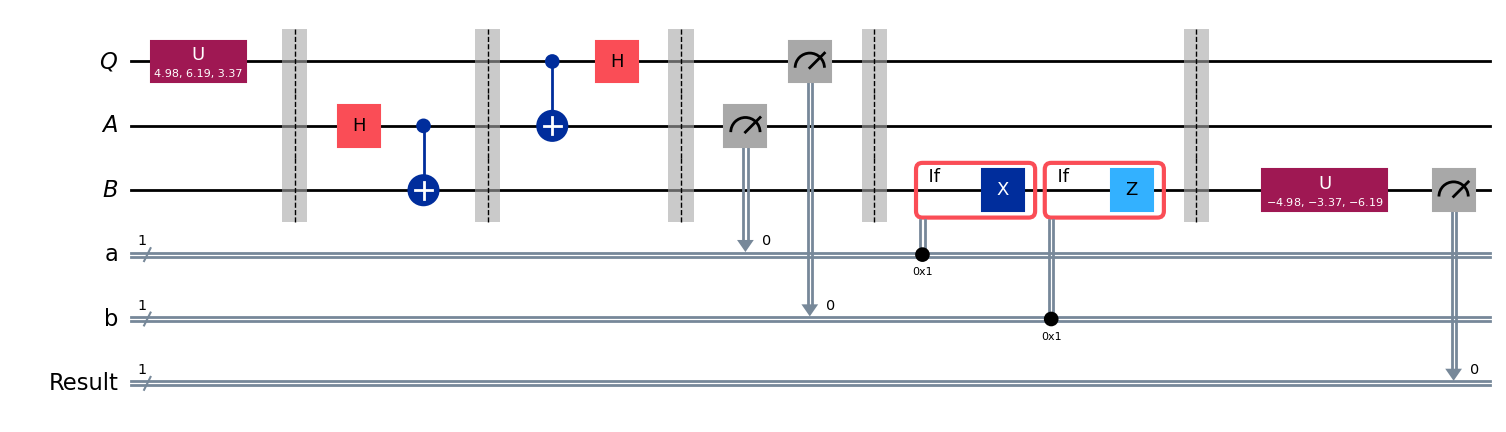

In [6]:
# Create a new circuit including the same bits and qubits used in the
# teleportation protocol.

test = QuantumCircuit(qubit, ebit0, ebit1, a, b)

# Start with the randomly selected gate on Q

test.append(random_gate, qubit)
test.barrier()

# Append the entire teleportation protocol from above.

test = test.compose(protocol)
test.barrier()

# Finally, apply the inverse of the random unitary to B and measure.

test.append(random_gate.inverse(), ebit1)
result = ClassicalRegister(1, "Result")
test.add_register(result)
test.measure(ebit1, result)

display(test.draw(output="mpl"))

* Finally, let's run the Aer simulator on this circuit and plot a histogram of the outputs. We'll see the statistics for all three classical bits: the bottom/leftmost bit should always be 0, indicating that the qubit Q was successfully teleported into B, while the other two bits should be roughly uniform.

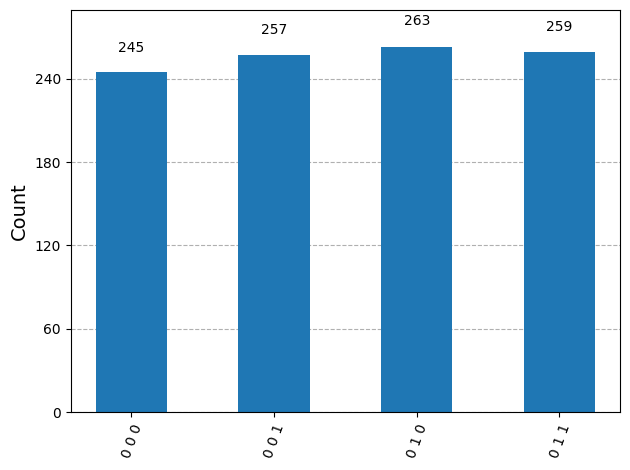

In [7]:
result = AerSimulator().run(test).result()
statistics = result.get_counts()
display(plot_histogram(statistics))

* We can also filter the statistics to focus just on the test result qubit if we wish, like this:

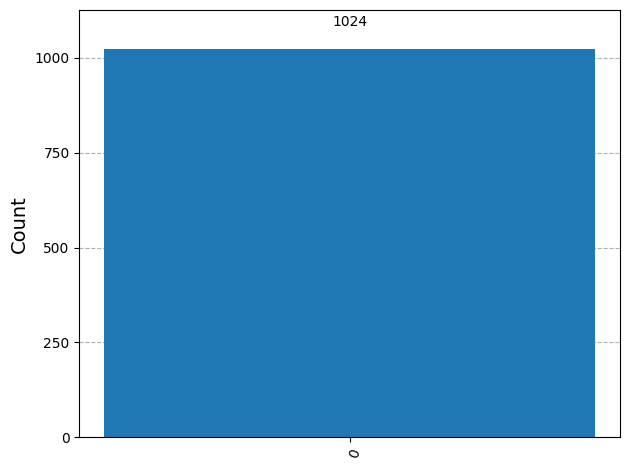

In [8]:
filtered_statistics = marginal_distribution(statistics, [2])
display(plot_histogram(filtered_statistics))

# Superdense coding
* Superdense coding is a protocol that, in some sense, achieves a complementary aim to teleportation. Rather than allowing for the transmission of one qubit using two classical bits of communication (at the cost of one e-bit of entanglement), it allows for the transmission of two classical bits using one qubit of quantum communication (again, at the cost of one e-bit of entanglement).
* In greater detail, we have a sender (Alice) and a receiver (Bob) that share one e-bit of entanglement. According to the conventions in place for the lesson, this means that Alice holds a qubit A, Bob holds a qubit B, and together the pair (A,B) is in the state ∣ϕ +⟩.
* Alice wishes to transmit two classical bits to Bob, which we'll denoted by c and d, and she will accomplish this by sending him one qubit.
* It is reasonable to view this feat as being less interesting than the one that teleportation accomplishes. Sending qubits is likely to be so much more difficult than sending classical bits for the foreseeable future that trading one qubit of quantum communication for two bits of classical communication, at the cost of an e-bit no less, hardly seems worth it. However, this does not imply that superdense coding is not interesting, for it most certainly is.
* Fitting the theme of the lesson, one reason why superdense coding is interesting is that it demonstrates a concrete and (in the context of information theory) rather striking use of entanglement. A famous theorem in quantum information theory, known as Holevo's theorem, implies that without the use of a shared entangled state, it is impossible to communicate more than one bit of classical information by sending a single qubit. (Holevo's theorem is more general than this.
* Its precise statement is technical and requires explanation, but this is one consequence of it.) So, through superdense coding, shared entanglement effectively allows for the doubling of the classical information-carrying capacity of sending qubits.

# Protocol
The following quantum circuit diagram describes the superdense coding protocol:
![](https://learning-api.quantum.ibm.com/assets/aad61113-3252-4451-b343-aa376ba156a3?format=auto&quality=80)

In words, here is what Alice does:

1. If d=1, Alice performs a Z gate on her qubit A (and if d=0 she does not).
2. If c=1, Alice performs an X gate on her qubit A (and if c=0 she does not).
Alice then sends her qubit A to Bob.
* What Bob does when he receives the qubit A is to first perform a controlled-NOT gate, with A being the control and B being the target, and then he applies a Hadamard gate to A. He then measures B to obtain c and A to obtain d, with standard basis measurements in both cases.

# Analysis
* The idea behind this protocol is pretty simple: Alice effectively chooses which Bell state she would like to be sharing with Bob, she sends Bob her qubit, and Bob measures to determine which Bell state Alice chose.
* That is, they initially share ∣ϕ +⟩, and depending upon the bits c and d, Alice either leaves this state alone or shifts it to one of the other Bell states by applying I, X, Z, or XZ to her qubit A.

* Bob's actions have the following effects on the four Bell states:


* This can be checked directly, by computing the results of Bob's operations on these states one at a time.
* So, when Bob performs his measurements, he is able to determine which Bell state Alice chose. To verify that the protocol works correctly is a matter of checking each case:
* Ifcd=00, then the state of (B,A) when Bob receives A is ∣ϕ +⟩. He transforms this state into ∣00⟩ and obtains cd=00.
* If cd=01, then the state of (B,A) when Bob receives A is ∣ϕ −⟩. He transforms this state into ∣01⟩ and obtains cd=01.
* If cd=10, then the state of (B,A) when Bob receives A is ∣ψ +⟩. He transforms this state into ∣10⟩ and obtains cd=10.
* If cd=11, then the state of (B,A) when Bob receives A is ∣ψ −⟩. He transforms this state into −∣11⟩ and obtains cd=11. (The negative-one phase factor has no effect here.)

# Qiskit implementation
* Here is a simple implementation of superdense coding where we specify the circuit itself depending on the bits to be transmitted. First we'll choose two bits to be transmitted. (Later we'll choose them randomly, but for now we'll just make an arbitrary choice.)

In [10]:
c = "1"
d = "0"

Now we'll build the circuit accordingly. Here we'll just allow Qiskit to use the default names for the qubits: 
q_0 for the top qubit and q_1 for the bottom one.

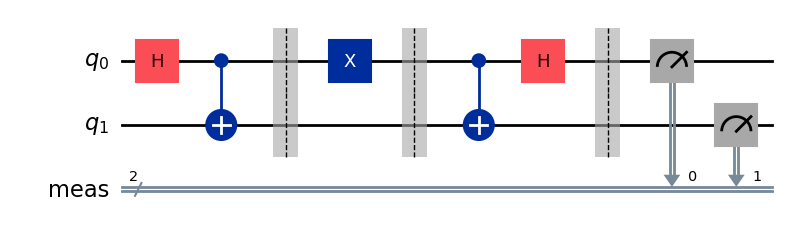

In [11]:
protocol = QuantumCircuit(2)

# Prepare ebit used for superdense coding
protocol.h(0)
protocol.cx(0, 1)
protocol.barrier()

# Alice's operations
if d == "1":
    protocol.z(0)
if c == "1":
    protocol.x(0)
protocol.barrier()

# Bob's actions
protocol.cx(0, 1)
protocol.h(0)
protocol.measure_all()

display(protocol.draw(output="mpl"))

* Not much is new here, except the measure_all function, which measures all of the qubits and puts the results into a single classical register (therefore having two bits in this case).
* Running the Aer simulator produces the expected output.

Measured 10 with frequency 1024


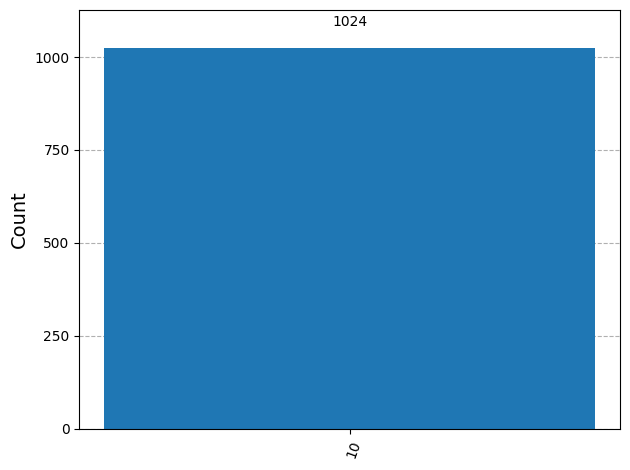

In [12]:
result = AerSimulator().run(protocol).result()
statistics = result.get_counts()

for outcome, frequency in statistics.items():
    print(f"Measured {outcome} with frequency {frequency}")

display(plot_histogram(statistics))

* Now let's use an additional qubit as a random bit generator — essentially to flip fair coins. We'll use it to randomly choose c and d, and then run the superdense coding protocol.

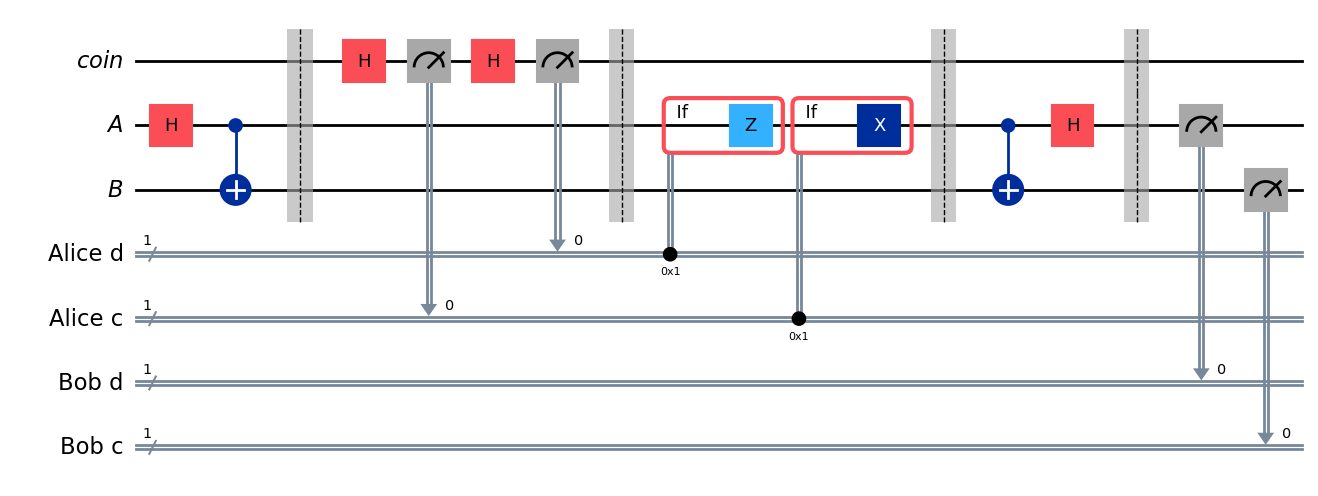

In [13]:
rbg = QuantumRegister(1, "coin")
ebit0 = QuantumRegister(1, "A")
ebit1 = QuantumRegister(1, "B")

Alice_c = ClassicalRegister(1, "Alice c")
Alice_d = ClassicalRegister(1, "Alice d")

test = QuantumCircuit(rbg, ebit0, ebit1, Alice_d, Alice_c)

# Initialize the ebit
test.h(ebit0)
test.cx(ebit0, ebit1)
test.barrier()

# Use the 'coin' qubit twice to generate Alice's bits c and d.
test.h(rbg)
test.measure(rbg, Alice_c)
test.h(rbg)
test.measure(rbg, Alice_d)
test.barrier()

# Now the protocol runs, starting with Alice's actions, which depend
# on her bits.
with test.if_test((Alice_d, 1), label="Z"):
    test.z(ebit0)
with test.if_test((Alice_c, 1), label="X"):
    test.x(ebit0)
test.barrier()

# Bob's actions
test.cx(ebit0, ebit1)
test.h(ebit0)
test.barrier()

Bob_c = ClassicalRegister(1, "Bob c")
Bob_d = ClassicalRegister(1, "Bob d")
test.add_register(Bob_d)
test.add_register(Bob_c)
test.measure(ebit0, Bob_d)
test.measure(ebit1, Bob_c)

display(test.draw(output="mpl"))

* Running the Aer simulator shows the results: Alice and Bob's classical bits always agree.

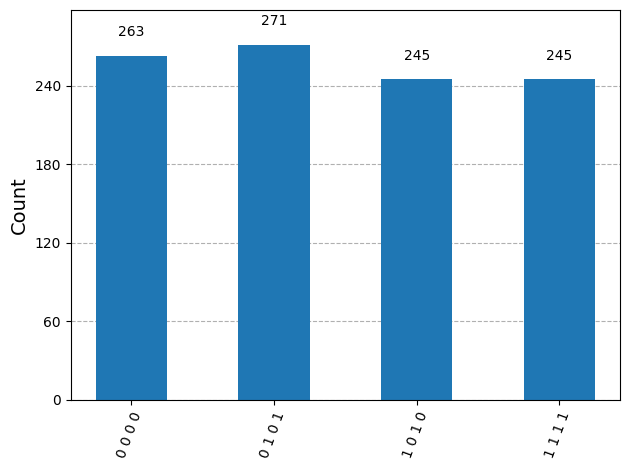

In [14]:
result = AerSimulator().run(test).result()
statistics = result.get_counts()
display(plot_histogram(statistics))

# The CHSH game
* The last example to be discussed in this lesson is not a protocol, but a game known as the CHSH game.
* When we speak of a game in this context, we're not talking about something that's meant to be played for fun or sport, but rather a mathematical abstraction in the sense of game theory. Mathematical abstractions of games are studied in economics and computer science, for instance, and they are both fascinating and useful.
* The letters CHSH refer to the authors — John Clauser, Michael Horne, Abner Shimony, and Richard Holt — of a 1969 paper where the example was first described. They did not describe the example as a game, but rather as an experiment. Its description as a game, however, is both natural and intuitive.
* The CHSH game falls within a class of games known as nonlocal games. Nonlocal games are incredibly interesting and have deep connections to physics, computer science, and mathematics — holding mysteries that still remain unsolved. We'll begin the section by explaining what nonlocal games are, and then we'll focus in on the CHSH game and what makes it interesting.

# Nonlocal games
* A nonlocal game is a cooperative game where two players, Alice and Bob, work together to achieve a particular outcome. The game is run by a referee, who behaves according to strict guidelines that are known to Alice and Bob.
* Alice and Bob can prepare for the game however they choose, but once the game starts they are forbidden from communicating. We might imagine the game taking place in a secure facility of some sort — as if the referee is playing the role of a detective and Alice and Bob are suspects being interrogated in different rooms. But another way to think about the set-up is that Alice and Bob are separated by a vast distance, and communication is prohibited because the speed of light doesn't allow for it within the running time of the game. That is to say, if Alice tries to send a message to Bob, the game will be over by the time he receives it, and vice versa.
* The way a nonlocal game works is that the referee first asks each of Alice and Bob a question. We'll use the letter x to refer to Alice's question and y to refer to Bob's question. Here we're thinking of x and y as being classical states, and in the CHSH game x and y are bits.
* The referee uses randomness to select these questions. To be precise, there is some probability p(x,y) associated with each possible pair (x,y) of questions, and the referee has vowed to choose the questions randomly, at the time of the game, in this way. Everyone, including Alice and Bob, knows these probabilities — but nobody knows specifically which pair (x,y) will be chosen until the game begins.

* After Alice and Bob receive their questions, they must then provide answers: Alice's answer is 
a and Bob's answer is b. Again, these are classical states in general, and bits in the CHSH game.
* At this point the referee makes a decision: Alice and Bob either win or lose depending on whether or not the pair of answers (a,b) is deemed correct for the pair of questions (x,y) according to some fixed set of rules.
* Different rules mean different games, and the rules for the CHSH game specifically are described in the section following this one. As was already suggested, the rules are known to everyone.
* The following diagram provides a graphic representation of the interactions.
![](https://learning-api.quantum.ibm.com/assets/f3d51829-baa3-47ae-87fa-5967ab9172f8?format=auto&quality=80)

* It is the uncertainty about which questions will be asked, and specifically the fact that each player doesn't know the other player's question, that makes nonlocal games challenging for Alice and Bob — just like colluding suspects in different rooms trying to keep their story straight.
* A precise description of the referee defines an instance of a nonlocal game. This includes a specification of the probabilities p(x,y) for each question pair along with the rules that determine whether each pair of answers (a,b) wins or loses for each possible question pair (x,y).
* We'll take a look at the CHSH game momentarily, but before that let us briefly acknowledge that it's also interesting to consider other nonlocal games. In fact, it's extremely interesting; there are some pretty simple nonlocal games for which it's currently not known how well Alice and Bob can play using entanglement.
* The set-up is simple, but there's complexity at work — and for some games it can be impossibly difficult to compute best or near-best strategies for Alice and Bob. This is the mind-blowing nature of the non-local games model.

# CHSH game description
* Here is the precise description of the CHSH game, where (as above) x is Alice's question, y is Bob's question, a is Alice's answer, and b is Bob's answer:
- The questions and answers are all bits: x,y,a,b∈{0,1}.
- The referee chooses the questions (x,y) uniformly at random. That is, each of the four possibilities, (0,0), (0,1), (1,0), and (1,1), is selected with probability 1/4.
- The answers (a,b) win for the questions (x,y) if a⊕b=x∧y and lose otherwise. The following table expresses this rule by listing the winning and losing conditions on the answers (a,b) for each pair of questions (x,y).
- Table Image